# Image Classification using CIFAR-10 Dataset

## Importing Libraries

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
import warnings

In [2]:
warnings.filterwarnings("ignore", category=UserWarning)

## Loading the Dataset

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


## Visualizing

In [5]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

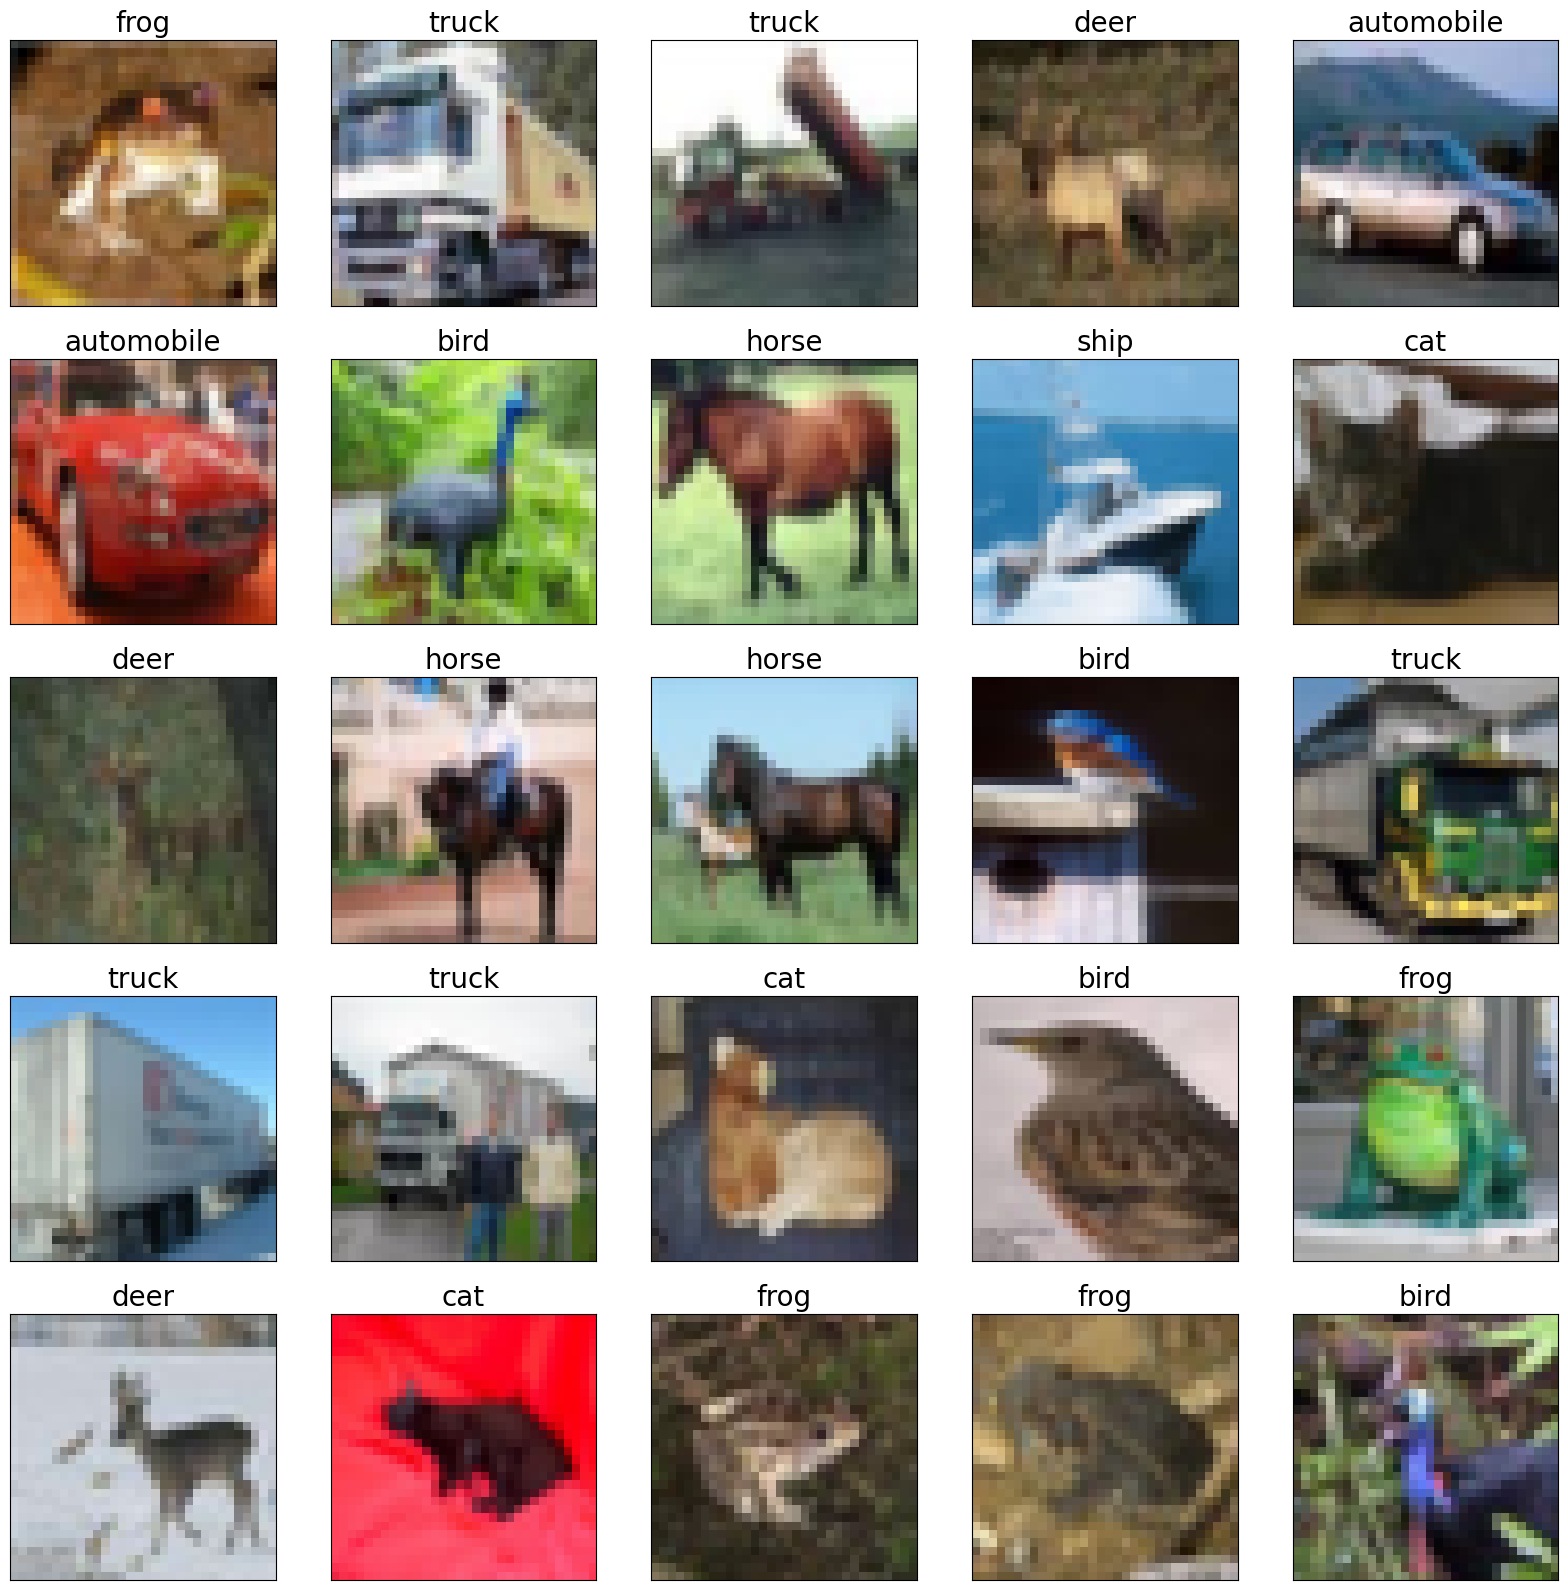

In [6]:
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]], fontsize=20)
plt.show()

## Normalising

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Converting to one-hot encoding

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Data Augmentation -> Rotation, Shifting, Flipping

In [9]:
datagen = ImageDataGenerator(
    rotation_range=15,         
    width_shift_range=0.1,     
    height_shift_range=0.1,    
    horizontal_flip=True,
)

datagen.fit(x_train)

## Building the CNN Model

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

### Compiling the Model

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

In [12]:
tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [14]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [15]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, tensorboard_callback]
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.2930 - loss: 1.9017 - val_accuracy: 0.4576 - val_loss: 1.5199
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.4729 - loss: 1.4514 - val_accuracy: 0.5802 - val_loss: 1.1707
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.5446 - loss: 1.2755 - val_accuracy: 0.6243 - val_loss: 1.0579
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.5876 - loss: 1.1702 - val_accuracy: 0.6760 - val_loss: 0.9229
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.6124 - loss: 1.0997 - val_accuracy: 0.6818 - val_loss: 0.9078
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6309 - loss: 1.0539 - val_accuracy: 0.6979 - val_loss: 0.8636
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6535 - loss: 0.9957 - val_accuracy: 0.7182 - val_loss: 0.8065
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.6644 - loss: 0.9616 - 

## Evaluation

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 - 3s - 9ms/step - accuracy: 0.7652 - loss: 0.6793
Test Accuracy: 76.52%


## Visualize Training Progress

### Training Accuracy vs Validation Accuracy

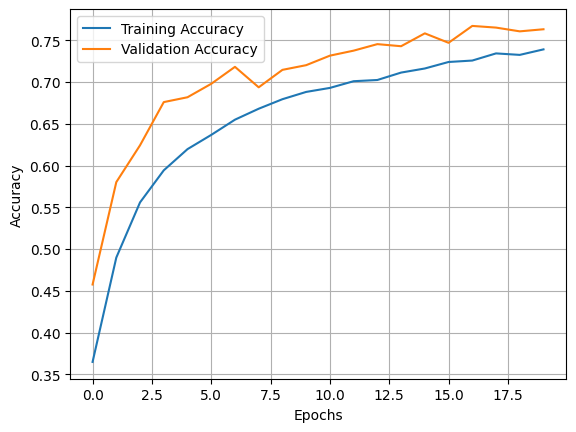

In [17]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### Training Loss vs Validation Loss

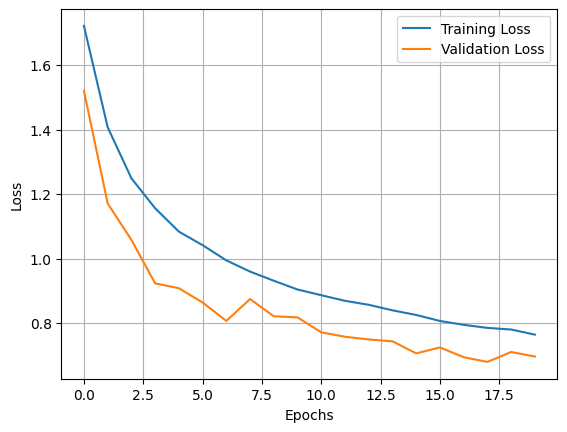

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

## Prediction & Visualization of Test Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Class: frog


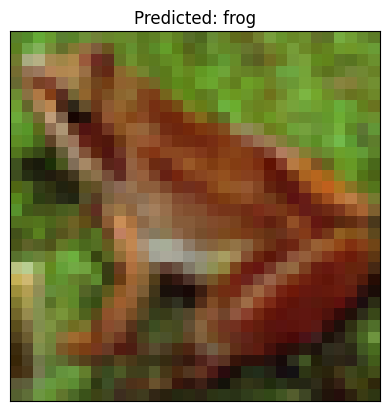

In [19]:
sample_image = x_test[29]
sample_image = np.expand_dims(sample_image, axis=0)
predictions = model.predict(sample_image)

predicted_class = np.argmax(predictions)

print(f"Predicted Class: {class_names[predicted_class]}")

plt.imshow(x_test[29])
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.xticks([])
plt.yticks([])
plt.show()

## Prediction on Multiple Samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image 1 - Predicted Class: truck


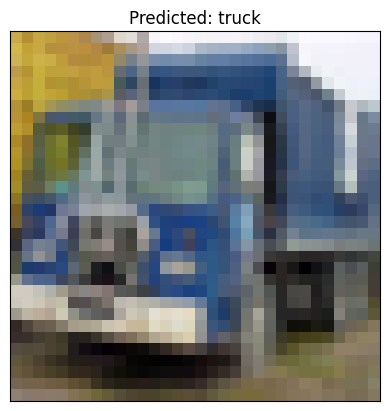

Image 2 - Predicted Class: ship


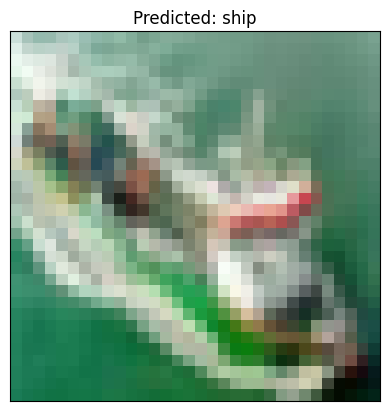

Image 3 - Predicted Class: dog


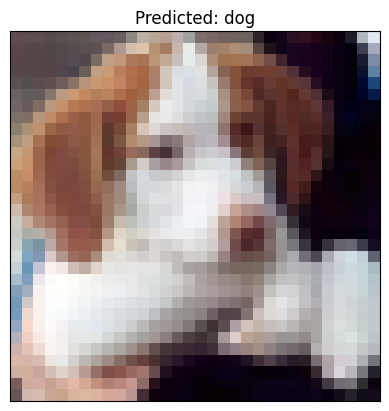

Image 4 - Predicted Class: horse


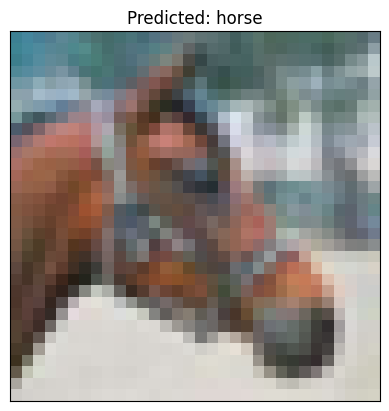

Image 5 - Predicted Class: ship


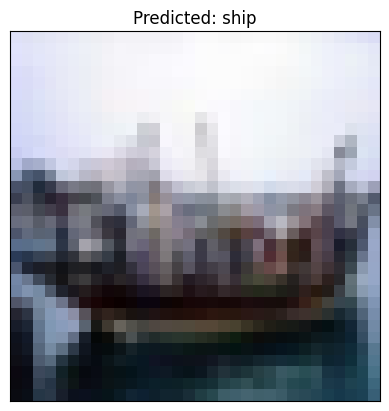

Image 6 - Predicted Class: frog


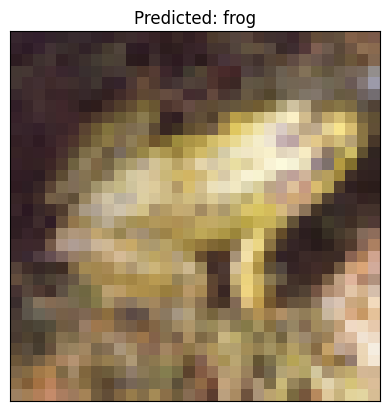

Image 7 - Predicted Class: horse


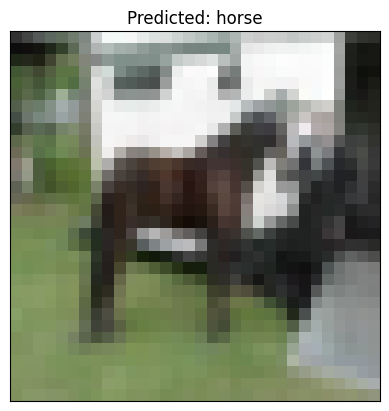

In [20]:
sample_images = x_test[14:21]
predictions = model.predict(sample_images)

for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction)
    print(f"Image {i+1} - Predicted Class: {class_names[predicted_class]}")
    
    plt.imshow(sample_images[i])
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.xticks([])
    plt.yticks([])
    plt.show()